In [ ]:
# Import required libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from queue import PriorityQueue
import time


#### Part 1: Basic Problem Setup



In [ ]:
class State:
    """
    Represents a state in the search space.
    Each state has:
    - value: The actual state representation
    - parent: Reference to the state that generated this state
    - cost: Cost to reach this state from start
    - heuristic: Estimated cost to goal (used in informed search)
    """
    def __init__(self, value, parent=None, cost=0, heuristic=0):
        self.value = value
        self.parent = parent
        self.cost = cost
        self.heuristic = heuristic

    def __lt__(self, other):
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)

class SearchProblem:
    """
    Defines a search problem with:
    - initial_state: Starting point
    - goal_state: Target state to reach
    - graph: State space representation
    """
    def __init__(self, initial_state, goal_state, graph):
        self.initial_state = State(initial_state)
        self.goal_state = goal_state
        self.graph = graph

    def get_neighbors(self, state):
        """Returns list of valid successor states"""
        return [State(neighbor, state)
                for neighbor in self.graph[state.value]]

    def is_goal(self, state):
        """Checks if current state is goal state"""
        return state.value == self.goal_state

#### Part 2: Search Algorithms Implementation



In [ ]:
def breadth_first_search(problem, verbose=True):
    """
    Breadth-First Search Implementation
    Strategy: Explores all nodes at current depth before moving deeper
    """
    print("\nExecuting Breadth-First Search...") if verbose else None

    # Initialize data structures
    frontier = deque([problem.initial_state])  # FIFO queue
    explored = set()
    nodes_expanded = 0
    max_frontier_size = 1

    while frontier:
        # Update statistics
        max_frontier_size = max(max_frontier_size, len(frontier))

        # Get next state to explore
        state = frontier.popleft()
        nodes_expanded += 1

        print(f"Exploring state: {state.value}") if verbose else None

        # Check if goal reached
        if problem.is_goal(state):
            path = get_solution_path(state)
            if verbose:
                print(f"Goal found!")
                print(f"Path: {path}")
                print(f"Nodes expanded: {nodes_expanded}")
                print(f"Maximum frontier size: {max_frontier_size}")
            return path, nodes_expanded, max_frontier_size

        # Expand current state
        explored.add(state.value)
        for neighbor in problem.get_neighbors(state):
            if neighbor.value not in explored and neighbor not in frontier:
                frontier.append(neighbor)
                print(f"Adding to frontier: {neighbor.value}") if verbose else None

    return None, nodes_expanded, max_frontier_size

def depth_first_search(problem, verbose=True):
    """
    Depth-First Search Implementation
    Strategy: Explores deepest node in the frontier first
    """
    print("\nExecuting Depth-First Search...") if verbose else None

    # Initialize data structures
    frontier = [problem.initial_state]  # LIFO stack
    explored = set()
    nodes_expanded = 0
    max_frontier_size = 1

    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))

        state = frontier.pop()
        nodes_expanded += 1

        print(f"Exploring state: {state.value}") if verbose else None

        if problem.is_goal(state):
            path = get_solution_path(state)
            if verbose:
                print(f"Goal found!")
                print(f"Path: {path}")
                print(f"Nodes expanded: {nodes_expanded}")
                print(f"Maximum frontier size: {max_frontier_size}")
            return path, nodes_expanded, max_frontier_size

        explored.add(state.value)
        for neighbor in reversed(problem.get_neighbors(state)):
            if neighbor.value not in explored and neighbor not in frontier:
                frontier.append(neighbor)
                print(f"Adding to frontier: {neighbor.value}") if verbose else None

    return None, nodes_expanded, max_frontier_size

def a_star_search(problem, heuristic_func, verbose=True):
    """
    A* Search Implementation
    Strategy: Combines path cost and heuristic estimate
    """
    print("\nExecuting A* Search...") if verbose else None

    frontier = PriorityQueue()
    frontier.put(problem.initial_state)
    explored = set()
    nodes_expanded = 0
    max_frontier_size = 1

    while not frontier.empty():
        max_frontier_size = max(max_frontier_size, frontier.qsize())

        state = frontier.get()
        nodes_expanded += 1

        print(f"Exploring state: {state.value}") if verbose else None

        if problem.is_goal(state):
            path = get_solution_path(state)
            if verbose:
                print(f"Goal found!")
                print(f"Path: {path}")
                print(f"Nodes expanded: {nodes_expanded}")
                print(f"Maximum frontier size: {max_frontier_size}")
            return path, nodes_expanded, max_frontier_size

        explored.add(state.value)
        for neighbor in problem.get_neighbors(state):
            if neighbor.value not in explored:
                neighbor.cost = state.cost + 1
                neighbor.heuristic = heuristic_func(neighbor.value, problem.goal_state)
                frontier.put(neighbor)
                print(f"Adding to frontier: {neighbor.value} with f(n)={neighbor.cost + neighbor.heuristic}") if verbose else None

    return None, nodes_expanded, max_frontier_size

def get_solution_path(state):
    """Helper function to reconstruct path from initial to goal state"""
    path = []
    while state:
        path.append(state.value)
        state = state.parent
    return path[::-1]

def visualize_search(graph, path=None, title="Search Path Visualization"):
    """Visualizes the graph and highlights solution path"""
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)

    plt.figure(figsize=(10, 8))

    # Draw basic graph structure
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Highlight solution path if provided
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='r', width=2)

    plt.title(title)
    plt.axis('off')
    plt.show()

#### Part 3: Real-World Problems and Analysis




Problem 1: Romania Road Trip Planning
Goal: Find the best route from Arad to Bucharest

Finding route from Arad to Bucharest:

Executing Breadth-First Search...
Exploring state: Arad
Adding to frontier: Zerind
Adding to frontier: Sibiu
Adding to frontier: Timisoara
Exploring state: Zerind
Adding to frontier: Oradea
Exploring state: Sibiu
Adding to frontier: Oradea
Adding to frontier: Rimnicu Vilcea
Adding to frontier: Fagaras
Exploring state: Timisoara
Adding to frontier: Lugoj
Exploring state: Oradea
Exploring state: Oradea
Exploring state: Rimnicu Vilcea
Adding to frontier: Craiova
Adding to frontier: Pitesti
Exploring state: Fagaras
Adding to frontier: Bucharest
Exploring state: Lugoj
Adding to frontier: Mehadia
Exploring state: Craiova
Adding to frontier: Drobeta
Adding to frontier: Pitesti
Exploring state: Pitesti
Adding to frontier: Bucharest
Exploring state: Bucharest
Goal found!
Path: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Nodes expanded: 12
Maximum frontier size: 5

Execut

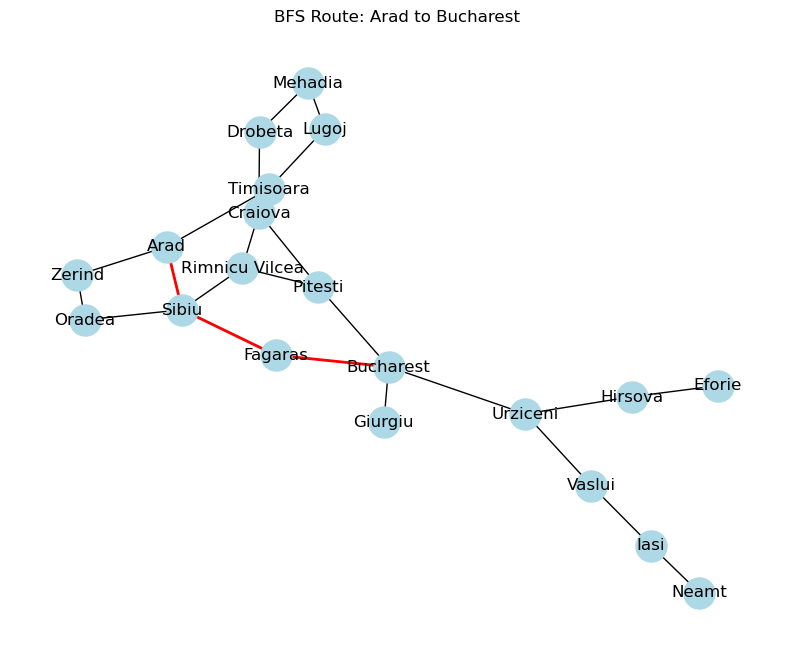


DFS Results:
Route found: Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Craiova -> Pitesti -> Bucharest
Total distance: 762 km
Cities visited: 12
Max cities in consideration: 6
Time taken: 0.0010 seconds


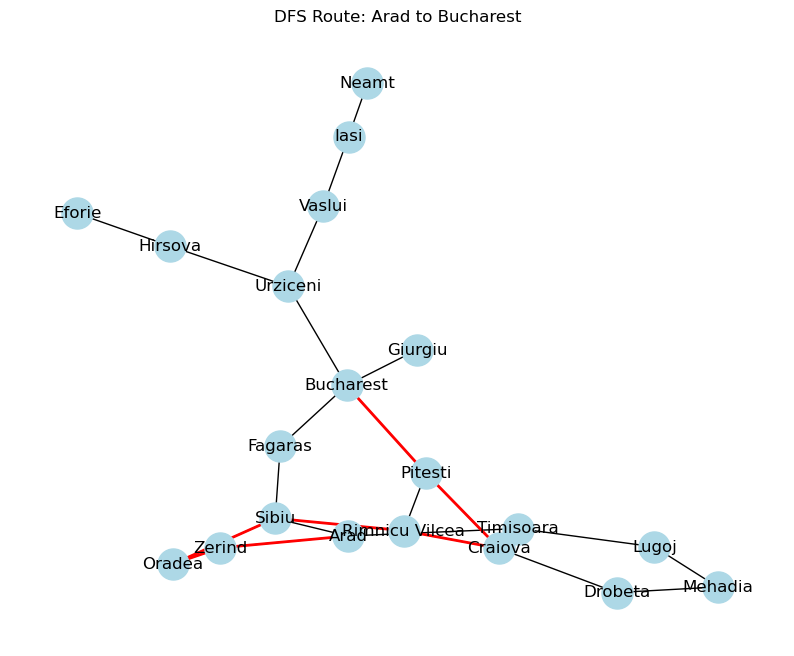


A* Results:
Route found: Arad -> Sibiu -> Fagaras -> Bucharest
Total distance: 450 km
Cities visited: 4
Max cities in consideration: 5
Time taken: 0.0000 seconds


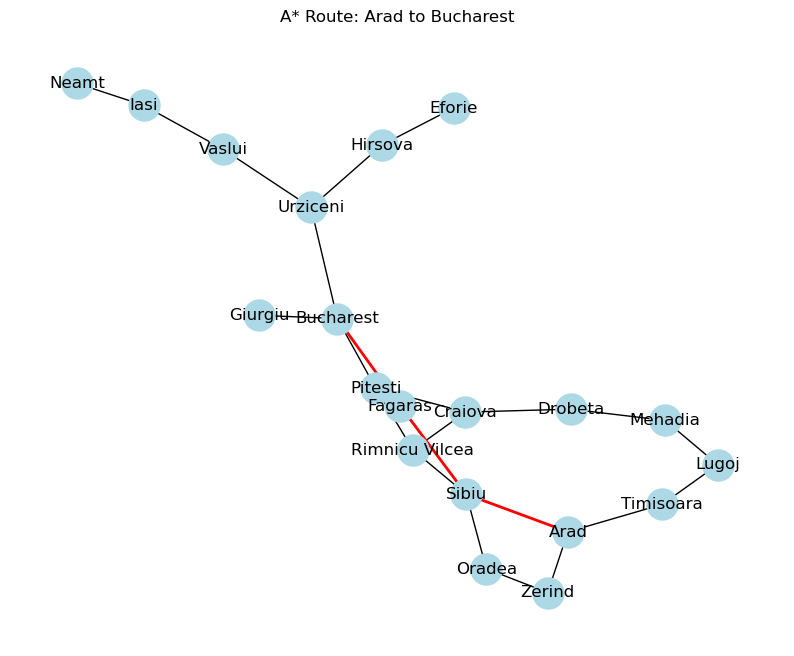


Problem 2: Course Prerequisites Planning
Goal: Find sequence to reach Advanced AI (AI301)

Finding course sequence to reach Advanced AI:

Executing Breadth-First Search...
Exploring state: CS101
Adding to frontier: CS201
Adding to frontier: CS202
Adding to frontier: CS203
Exploring state: CS201
Adding to frontier: CS301
Adding to frontier: CS302
Exploring state: CS202
Adding to frontier: CS301
Adding to frontier: CS303
Exploring state: CS203
Adding to frontier: CS302
Adding to frontier: CS304
Exploring state: CS301
Adding to frontier: AI301
Exploring state: CS302
Adding to frontier: AI301
Exploring state: CS301
Adding to frontier: AI301
Exploring state: CS303
Adding to frontier: AI301
Exploring state: CS302
Adding to frontier: AI301
Exploring state: CS304
Adding to frontier: AI301
Exploring state: AI301
Goal found!
Path: ['CS101', 'CS201', 'CS301', 'AI301']
Nodes expanded: 11
Maximum frontier size: 6

BFS Results:
Course sequence: CS101 -> CS201 -> CS301 -> AI301
Number of courses eva

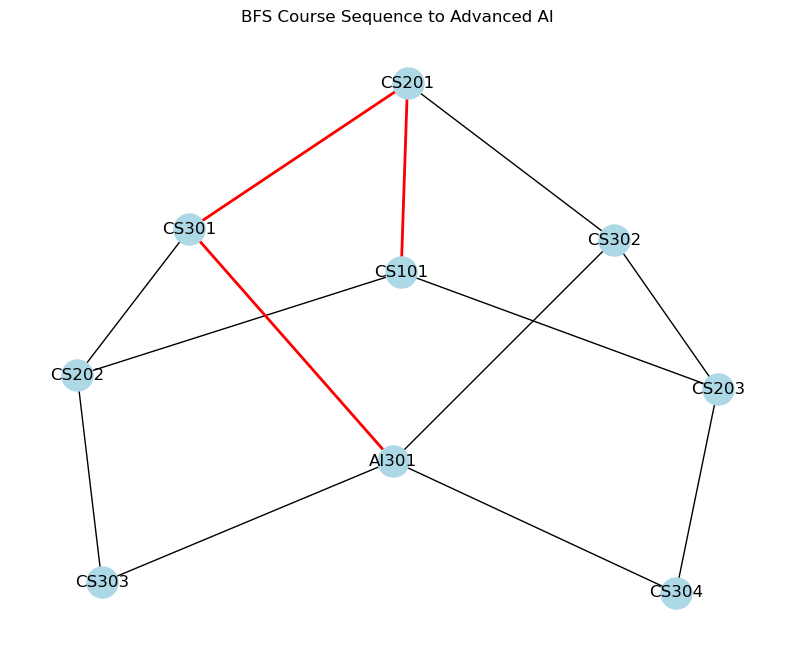


Executing Depth-First Search...
Exploring state: CS101
Adding to frontier: CS203
Adding to frontier: CS202
Adding to frontier: CS201
Exploring state: CS201
Adding to frontier: CS302
Adding to frontier: CS301
Exploring state: CS301
Adding to frontier: AI301
Exploring state: AI301
Goal found!
Path: ['CS101', 'CS201', 'CS301', 'AI301']
Nodes expanded: 4
Maximum frontier size: 4

DFS Results:
Course sequence: CS101 -> CS201 -> CS301 -> AI301
Number of courses evaluated: 4
Max courses in consideration: 4
Time taken: 0.0000 seconds


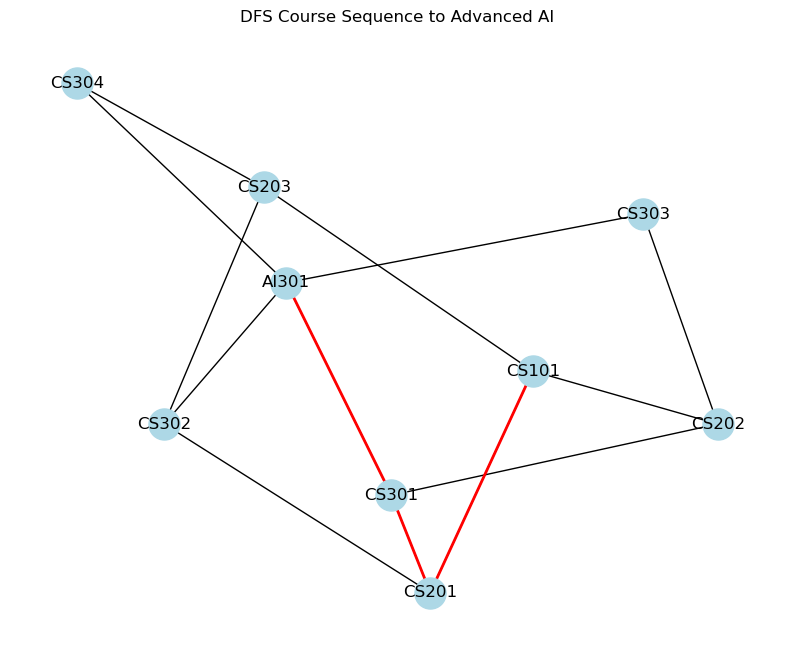


Executing A* Search...
Exploring state: CS101
Adding to frontier: CS201 with f(n)=2
Adding to frontier: CS202 with f(n)=1
Adding to frontier: CS203 with f(n)=1
Exploring state: CS202
Adding to frontier: CS301 with f(n)=2
Adding to frontier: CS303 with f(n)=2
Exploring state: CS203
Adding to frontier: CS302 with f(n)=2
Adding to frontier: CS304 with f(n)=2
Exploring state: CS301
Adding to frontier: AI301 with f(n)=3
Exploring state: CS303
Adding to frontier: AI301 with f(n)=3
Exploring state: CS304
Adding to frontier: AI301 with f(n)=3
Exploring state: CS201
Adding to frontier: CS302 with f(n)=2
Exploring state: CS302
Adding to frontier: AI301 with f(n)=3
Exploring state: CS302
Adding to frontier: AI301 with f(n)=3
Exploring state: AI301
Goal found!
Path: ['CS101', 'CS202', 'CS301', 'AI301']
Nodes expanded: 10
Maximum frontier size: 5

A* Results:
Course sequence: CS101 -> CS202 -> CS301 -> AI301
Number of courses evaluated: 10
Max courses in consideration: 5
Time taken: 0.0000 seconds

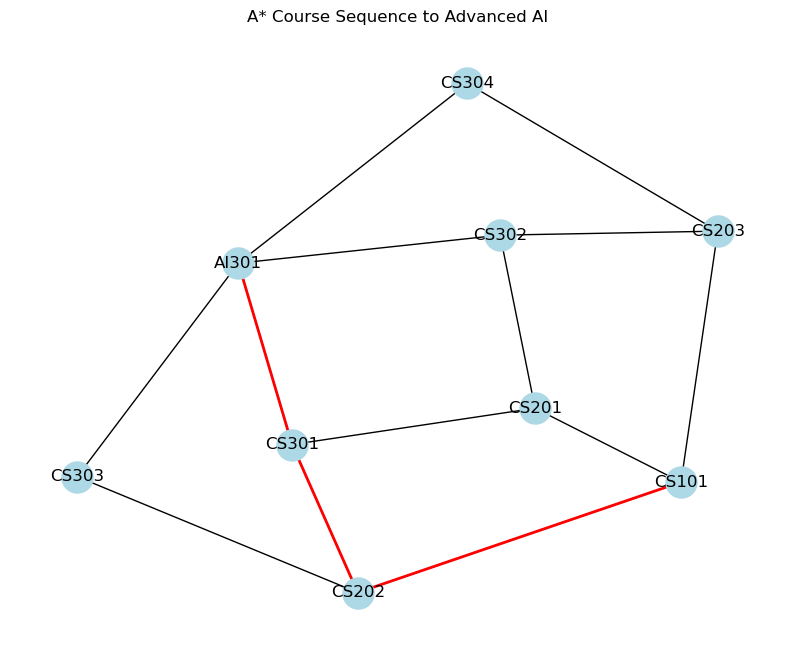

In [ ]:
def run_romania_experiment():
    """
    Romania Road Trip Planning Problem

    This is a classic problem in AI search where we need to find the optimal route
    between cities in Romania. The graph represents actual Romanian cities and roads,
    with edges weighted by distances in kilometers.
    """
    print("\nProblem 1: Romania Road Trip Planning")
    print("=" * 50)
    print("Goal: Find the best route from Arad to Bucharest")

    # Romania map as a graph with distances in kilometers
    romania_map = {
        'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
        'Zerind': {'Arad': 75, 'Oradea': 71},
        'Oradea': {'Zerind': 71, 'Sibiu': 151},
        'Timisoara': {'Arad': 118, 'Lugoj': 111},
        'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
        'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
        'Drobeta': {'Mehadia': 75, 'Craiova': 120},
        'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
        'Rimnicu Vilcea': {'Craiova': 146, 'Sibiu': 80, 'Pitesti': 97},
        'Sibiu': {'Arad': 140, 'Oradea': 151, 'Rimnicu Vilcea': 80, 'Fagaras': 99},
        'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
        'Pitesti': {'Craiova': 138, 'Rimnicu Vilcea': 97, 'Bucharest': 101},
        'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
        'Giurgiu': {'Bucharest': 90},
        'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
        'Hirsova': {'Urziceni': 98, 'Eforie': 86},
        'Eforie': {'Hirsova': 86},
        'Vaslui': {'Urziceni': 142, 'Iasi': 92},
        'Iasi': {'Vaslui': 92, 'Neamt': 87},
        'Neamt': {'Iasi': 87}
    }

    # Create problem instance
    problem = SearchProblem('Arad', 'Bucharest', romania_map)

    # Straight-line distances to Bucharest (heuristic)
    heuristic_to_bucharest = {
        'Arad': 366, 'Bucharest': 0, 'Craiova': 160,
        'Drobeta': 242, 'Eforie': 161, 'Fagaras': 176,
        'Giurgiu': 77, 'Hirsova': 151, 'Iasi': 226,
        'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
        'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193,
        'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80,
        'Vaslui': 199, 'Zerind': 374
    }

    def romania_heuristic(state1, state2):
        """Heuristic function using straight-line distances to Bucharest"""
        return heuristic_to_bucharest[state1]

    # Test all algorithms
    print("\nFinding route from Arad to Bucharest:")

    # BFS
    start_time = time.time()
    bfs_path, bfs_expanded, bfs_frontier = breadth_first_search(problem)
    bfs_time = time.time() - start_time

    # Calculate total distance for BFS path
    bfs_distance = sum(romania_map[bfs_path[i]][bfs_path[i+1]]
                      for i in range(len(bfs_path)-1)) if bfs_path else 0

    # DFS
    start_time = time.time()
    dfs_path, dfs_expanded, dfs_frontier = depth_first_search(problem)
    dfs_time = time.time() - start_time

    # Calculate total distance for DFS path
    dfs_distance = sum(romania_map[dfs_path[i]][dfs_path[i+1]]
                      for i in range(len(dfs_path)-1)) if dfs_path else 0

    # A*
    start_time = time.time()
    astar_path, astar_expanded, astar_frontier = a_star_search(
        problem, romania_heuristic)
    astar_time = time.time() - start_time

    # Calculate total distance for A* path
    astar_distance = sum(romania_map[astar_path[i]][astar_path[i+1]]
                        for i in range(len(astar_path)-1)) if astar_path else 0

    # Print comparison
    print("\nAlgorithm Comparison for Romania Road Trip:")
    print("-" * 50)
    algorithms = [
        ("BFS", bfs_path, bfs_expanded, bfs_frontier, bfs_time, bfs_distance),
        ("DFS", dfs_path, dfs_expanded, dfs_frontier, dfs_time, dfs_distance),
        ("A*", astar_path, astar_expanded, astar_frontier, astar_time, astar_distance)
    ]

    for name, path, expanded, frontier, time_taken, distance in algorithms:
        print(f"\n{name} Results:")
        print(f"Route found: {' -> '.join(path) if path else 'None'}")
        print(f"Total distance: {distance} km")
        print(f"Cities visited: {expanded}")
        print(f"Max cities in consideration: {frontier}")
        print(f"Time taken: {time_taken:.4f} seconds")

        # Visualize path
        visualize_search(romania_map, path, f"{name} Route: Arad to Bucharest")

def run_course_planning_experiment():
    """
    University Course Prerequisites Problem

    This problem demonstrates planning a course sequence considering prerequisites.
    The graph represents courses where edges indicate prerequisites, and we need
    to find a valid sequence to reach an advanced course.
    """
    print("\nProblem 2: Course Prerequisites Planning")
    print("=" * 50)
    print("Goal: Find sequence to reach Advanced AI (AI301)")

    # Course graph: key = course, values = courses you can take after this one
    course_graph = {
        'CS101': ['CS201', 'CS202', 'CS203'],  # Intro to Programming
        'CS201': ['CS301', 'CS302'],           # Data Structures
        'CS202': ['CS301', 'CS303'],           # Algorithms
        'CS203': ['CS302', 'CS304'],           # Computer Systems
        'CS301': ['AI301'],                    # Database Systems
        'CS302': ['AI301'],                    # Software Engineering
        'CS303': ['AI301'],                    # Theory of Computation
        'CS304': ['AI301'],                    # Computer Networks
        'AI301': [],                           # Advanced AI
    }

    # Create problem instance
    problem = SearchProblem('CS101', 'AI301', course_graph)

    # Heuristic: estimate remaining levels of courses needed
    def course_level_heuristic(course1, course2):
        """Estimates remaining levels based on course numbering"""
        current_level = int(course1[2:5])
        goal_level = int(course2[2:5])
        return max(0, (goal_level - current_level) // 100)

    # Test all algorithms
    print("\nFinding course sequence to reach Advanced AI:")

    algorithms = [
        ("BFS", breadth_first_search),
        ("DFS", depth_first_search),
        ("A*", lambda p: a_star_search(p, course_level_heuristic))
    ]

    for name, algorithm in algorithms:
        start_time = time.time()
        path, expanded, frontier = algorithm(problem)
        time_taken = time.time() - start_time

        print(f"\n{name} Results:")
        print(f"Course sequence: {' -> '.join(path) if path else 'None'}")
        print(f"Number of courses evaluated: {expanded}")
        print(f"Max courses in consideration: {frontier}")
        print(f"Time taken: {time_taken:.4f} seconds")

        # Visualize path
        visualize_search(course_graph, path,
                        f"{name} Course Sequence to Advanced AI")

if __name__ == "__main__":
    # Run both experiments
    run_romania_experiment()
    run_course_planning_experiment()

#### Part 3: Classic AI Search Problems




Traveling Salesman Problem Experiment
Distance Matrix:
[[ 0 58 57 83 49]
 [58  0 48 61 63]
 [57 48  0 54 26]
 [83 61 54  0 79]
 [49 63 26 79  0]]

Finding optimal solution using Brute Force...

Brute Force Solution:
Route: City 0 -> City 1 -> City 3 -> City 2 -> City 4 -> City 0
Total Distance: 248
Time taken: 0.0006 seconds


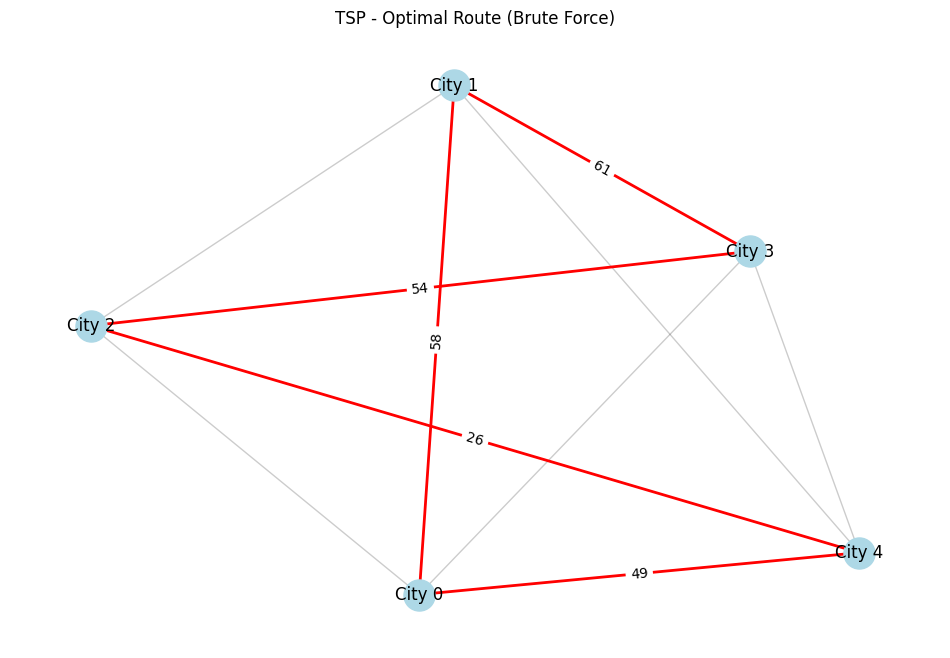


Finding solution using Nearest Neighbor heuristic...

Nearest Neighbor Solution:
Route: City 0 -> City 4 -> City 2 -> City 1 -> City 3 -> City 0
Total Distance: 267
Time taken: 0.0001 seconds


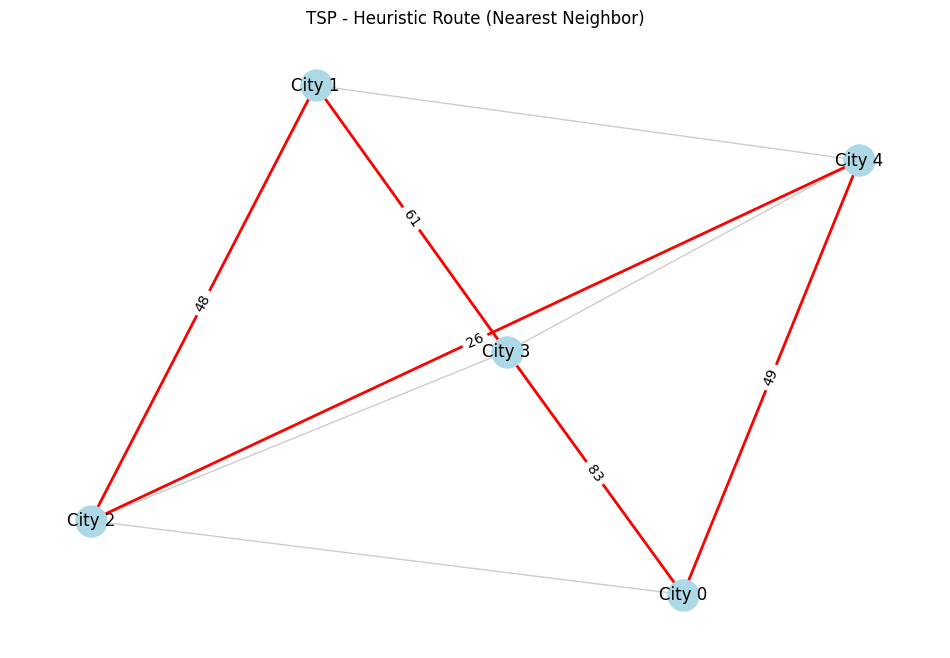


Solution Comparison:
Brute Force: Distance = 248, Time = 0.0006s
Nearest Neighbor: Distance = 267, Time = 0.0001s
Difference: 7.7% longer path
Speed improvement: 11.8x faster

Detailed Statistics:
Number of cities: 5
Total possible routes: 120
Brute Force route: [0, 1, 3, 2, 4]
Nearest Neighbor route: [0, 4, 2, 1, 3]

Route Analysis:
Cities visited in different order: at positions [1, 2, 3, 4]

Problem 2: 8-Queens Problem

Solving 4-Queens Problem:
Solution found in 0.0000 seconds
Board configuration:
. Q . .
. . . Q
Q . . .
. . Q .


<ipython-input-4-b3758c951734>:206: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  print(f"Total possible routes: {np.math.factorial(n_cities)}")


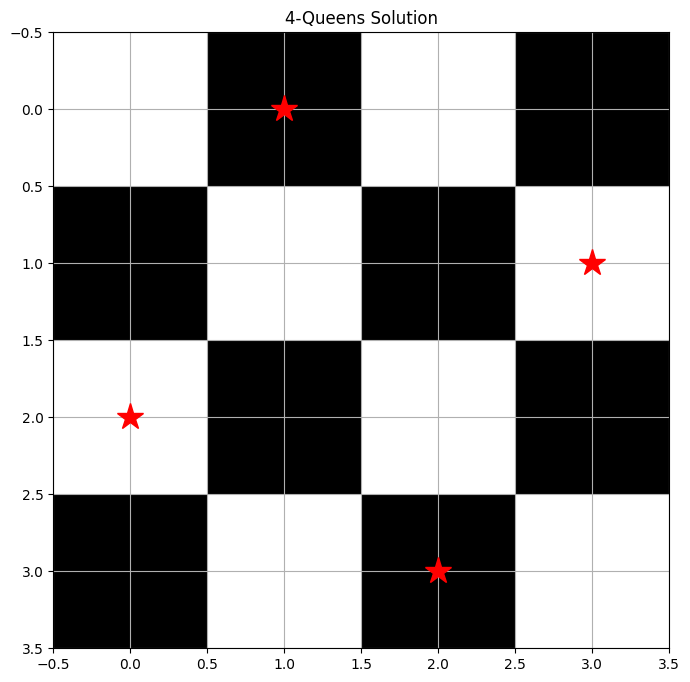


Solving 8-Queens Problem:
Solution found in 0.0011 seconds
Board configuration:
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .


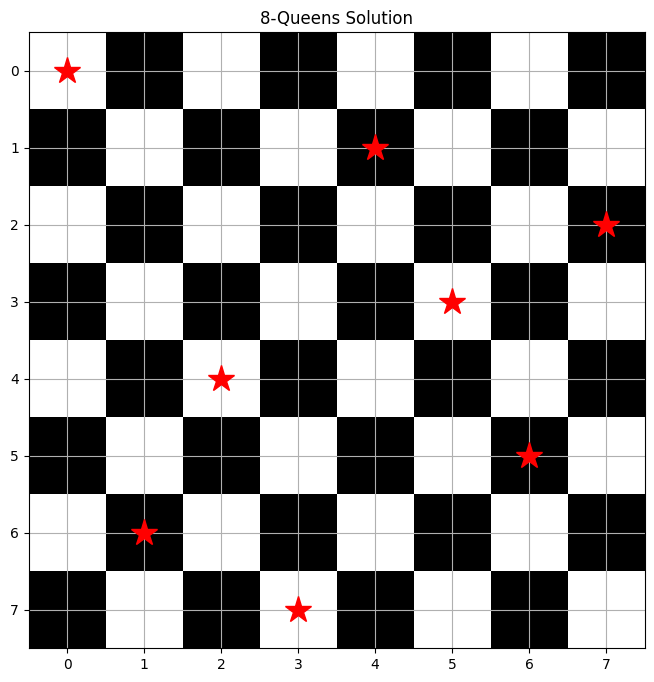

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
import random
import time

class TSPProblem:
    def __init__(self, cities, distances):
        self.cities = cities
        self.distances = distances
        self.optimal_route = None
        self.optimal_distance = float('inf')

    def calculate_route_distance(self, route):
        distance = 0
        for i in range(len(route)-1):
            distance += self.distances[route[i]][route[i+1]]
        # Add return to start
        distance += self.distances[route[-1]][route[0]]
        return distance

    def solve_bruteforce(self):
        n_cities = len(self.cities)
        for route in permutations(range(n_cities)):
            distance = self.calculate_route_distance(route)
            if distance < self.optimal_distance:
                self.optimal_distance = distance
                self.optimal_route = route

        return list(self.optimal_route), self.optimal_distance

    def solve_nearest_neighbor(self):
        n_cities = len(self.cities)
        unvisited = set(range(1, n_cities))
        route = [0]  # Start with city 0

        while unvisited:
            last = route[-1]
            next_city = min(unvisited,
                          key=lambda x: self.distances[last][x])
            route.append(next_city)
            unvisited.remove(next_city)

        distance = self.calculate_route_distance(route)
        return route, distance

    def visualize_route(self, route=None, title="TSP Route"):
        G = nx.Graph()

        # Add edges with weights
        for i in range(len(self.cities)):
            for j in range(i+1, len(self.cities)):
                G.add_edge(i, j, weight=self.distances[i][j])

        pos = nx.spring_layout(G)
        plt.figure(figsize=(12, 8))

        # Draw basic graph
        nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                             node_size=500)
        nx.draw_networkx_edges(G, pos, alpha=0.2)
        nx.draw_networkx_labels(G, pos,
                              {i: f"City {i}" for i in range(len(self.cities))})

        # Highlight route if provided
        if route:
            # Create path edges including return to start
            path_edges = list(zip(route[:-1], route[1:]))
            path_edges.append((route[-1], route[0]))
            nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                                 edge_color='r', width=2)

            # Add edge labels for the route
            edge_labels = {(route[i], route[i+1]):
                         self.distances[route[i]][route[i+1]]
                         for i in range(len(route)-1)}
            edge_labels[(route[-1], route[0])] = self.distances[route[-1]][route[0]]
            nx.draw_networkx_edge_labels(G, pos, edge_labels)

        plt.title(title)
        plt.axis('off')
        plt.show()

class QueensProblem:
    """
    8-Queens Problem

    Goal: Place 8 queens on a chess board so that no queen threatens another

    State Space: All possible queen placements
    Actions: Placing a queen in a valid position
    Constraints: No queen can share row, column, or diagonal
    """
    def __init__(self, n=8):
        self.n = n
        self.board = [-1] * n  # board[r] = c means queen at row r, column c

    def is_safe(self, row, col):
        """Check if queen can be placed at board[row] = col"""
        for r in range(row):
            if self.board[r] == col:  # Same column
                return False
            if abs(self.board[r] - col) == abs(r - row):  # Same diagonal
                return False
        return True

    def solve(self, row=0):
        """Solve using backtracking"""
        if row >= self.n:
            return True

        for col in range(self.n):
            if self.is_safe(row, col):
                self.board[row] = col
                if self.solve(row + 1):
                    return True
                self.board[row] = -1

        return False

    def visualize_solution(self):
        """Visualize the chess board with queens"""
        plt.figure(figsize=(8, 8))
        board = np.zeros((self.n, self.n))

        # Create checkered pattern
        board[1::2, 0::2] = 1
        board[0::2, 1::2] = 1

        plt.imshow(board, cmap='binary')

        # Place queens
        for row in range(self.n):
            if self.board[row] != -1:
                plt.plot(self.board[row], row, 'r*', markersize=20)

        plt.grid(True)
        plt.title(f"{self.n}-Queens Solution")
        plt.show()


def run_tsp_experiment():
    print("\nTraveling Salesman Problem Experiment")
    print("=" * 50)

    # Create sample problem
    n_cities = 5
    cities = [f"City{i}" for i in range(n_cities)]

    # Create random symmetric distance matrix
    np.random.seed(42)
    distances = np.random.randint(10, 100, size=(n_cities, n_cities))
    distances = (distances + distances.T) // 2  # Make symmetric
    np.fill_diagonal(distances, 0)  # Zero distance to self

    print("Distance Matrix:")
    print(distances)

    # Create and solve TSP
    tsp = TSPProblem(cities, distances)

    # Brute force solution
    print("\nFinding optimal solution using Brute Force...")
    start_time = time.time()
    bf_route, bf_distance = tsp.solve_bruteforce()
    bf_time = time.time() - start_time

    print("\nBrute Force Solution:")
    print(f"Route: {' -> '.join(f'City {i}' for i in bf_route)} -> City {bf_route[0]}")
    print(f"Total Distance: {bf_distance}")
    print(f"Time taken: {bf_time:.4f} seconds")

    # Visualize brute force solution
    tsp.visualize_route(bf_route, "TSP - Optimal Route (Brute Force)")

    # Nearest neighbor solution
    print("\nFinding solution using Nearest Neighbor heuristic...")
    start_time = time.time()
    nn_route, nn_distance = tsp.solve_nearest_neighbor()
    nn_time = time.time() - start_time

    print("\nNearest Neighbor Solution:")
    print(f"Route: {' -> '.join(f'City {i}' for i in nn_route)} -> City {nn_route[0]}")
    print(f"Total Distance: {nn_distance}")
    print(f"Time taken: {nn_time:.4f} seconds")

    # Visualize nearest neighbor solution
    tsp.visualize_route(nn_route, "TSP - Heuristic Route (Nearest Neighbor)")

    # Compare solutions
    print("\nSolution Comparison:")
    print(f"Brute Force: Distance = {bf_distance}, Time = {bf_time:.4f}s")
    print(f"Nearest Neighbor: Distance = {nn_distance}, Time = {nn_time:.4f}s")
    print(f"Difference: {((nn_distance - bf_distance) / bf_distance * 100):.1f}% longer path")

    # Avoid division by zero for speed comparison
    if nn_time > 0 and bf_time > 0:
        print(f"Speed improvement: {(bf_time / nn_time):.1f}x faster")
    else:
        print("Speed comparison unavailable (execution too fast to measure)")

    # Additional statistics
    print("\nDetailed Statistics:")
    print(f"Number of cities: {n_cities}")
    print(f"Total possible routes: {np.math.factorial(n_cities)}")
    print(f"Brute Force route: {bf_route}")
    print(f"Nearest Neighbor route: {nn_route}")

    # Compare route differences
    print("\nRoute Analysis:")
    print("Cities visited in different order:", end=" ")
    different_positions = [i for i in range(n_cities) if bf_route[i] != nn_route[i]]
    if different_positions:
        print(f"at positions {different_positions}")
    else:
        print("None (same route found)")

def run_queens_experiment():
    """
    Demonstrate 8-Queens problem solution
    """
    print("\nProblem 2: 8-Queens Problem")
    print("=" * 50)

    # Solve for different board sizes
    for n in [4, 8]:
        print(f"\nSolving {n}-Queens Problem:")
        queens = QueensProblem(n)

        start_time = time.time()
        if queens.solve():
            solve_time = time.time() - start_time
            print(f"Solution found in {solve_time:.4f} seconds")
            print("Board configuration:")
            for row in range(n):
                line = ['Q' if col == queens.board[row] else '.'
                       for col in range(n)]
                print(' '.join(line))

            queens.visualize_solution()
        else:
            print("No solution exists")

if __name__ == "__main__":
    # Run TSP experiment
    run_tsp_experiment()

    # Run Queens experiment
    run_queens_experiment()
